# Implementing Trading with Machine Learning Regression - Part 3

In the previous notebook, we have covered data preprocessing. We predicted high and low values. This notebbok will create signals and compare strategy returns over GLD returns. In this notebook, we will generate a trading strategy using the high, and low prices predicted using the linear regression model. Following this, we will study the strategy performance. The key steps are:

1. Import data
2. Signal generation
3. Plotting GLD returns and strategy returns

In [2]:
## Import the libraries
import numpy as np 
import pandas as pd 

# For Plotting
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# To ignore unwanted warnings
import warnings
warnings.filterwarnings("ignore")

### Import the data

We import the `regression_test_dataset.csv`. It has gold prices data with predicted high and predicted low values calculated using regression model

In [3]:
# Importing the data
test_dataset = pd.read_csv('data/test_dataset.csv', index_col='Date', parse_dates=['Date'])

# Printing index intp datatime format
test_dataset.tail()

,Close,High,P_H,Low,P_L
Date,,,,,
2019-05-08,120.910004,121.540001,122.061923,120.769997,121.001003
2019-05-09,121.199997,121.620003,121.486835,120.860001,120.423104
2019-05-10,121.430000,121.730003,121.944117,121.300003,120.876820
2019-05-13,122.669998,122.849998,123.153937,122.330002,122.085799
2019-05-14,122.459999,122.660004,123.093834,122.120003,122.049181


### Signal Generation
We will use the predicted high and predicted low values to determine whether to buy or sell GLD ETF the next day

We will sell GLD ETF when
1. The actual high value is greater than the predicted high value
2. The actual low value is greater than the predicted high value

We will buy GLD ETF when:
1. The actual high is less than than the predicted high value
2. The actual low is less than the predicted low value

In [4]:
# Initialising signal column to be zero
test_dataset['Signal'] = 0

# When selling, assigning signal value as -1
test_dataset.loc[(test_dataset['High'] > test_dataset['P_H']) & (test_dataset['Low'] > test_dataset['P_L']), 'Signal'] = -1

# When buying assigning signal value as +1
test_dataset.loc[(test_dataset['High'] < test_dataset['P_H']) & (test_dataset['Low'] < test_dataset['P_L']), 'Signal'] = 1

In [5]:
test_dataset[test_dataset['Signal'] == 1]

,Close,High,P_H,Low,P_L,Signal
Date,,,,,,
2017-08-17,122.489998,122.610001,122.833165,121.760002,121.764112,1
2017-08-18,122.300003,123.540001,123.885662,122.000000,122.812545,1
2017-08-22,122.209999,122.559998,123.095788,121.849998,122.022153,1
2017-08-25,122.739998,123.019997,123.326927,121.290001,122.218462,1
2017-08-29,124.419998,125.870003,126.325306,124.050003,125.227530,1
...,...,...,...,...,...,...
2019-04-01,121.529999,122.430000,122.936447,121.459999,121.867688,1
2019-04-08,122.510002,123.019997,123.484343,122.400002,122.440059,1
2019-04-11,121.949997,122.750000,123.057829,121.790001,121.995646,1


### Strategy Returns
Here, we will compute the GLD returns and strategy returns.

`gld_returns` are simply using percentage change in two consecutive `Close`.

For `test_dataset` we use `Signal` of the last day and `gld_returns`

In [7]:
# Compute GLD returns
test_dataset['gld_returns'] = test_dataset['Close'].pct_change()

# Compute strategy returns
test_dataset['Strategy'] = test_dataset['gld_returns'] * test_dataset['Signal'].shift(1)

# Printing tail of the test_dataset
test_dataset.tail()

,Close,High,P_H,Low,P_L,Signal,gld_returns,Strategy
Date,,,,,,,,
2019-05-08,120.910004,121.540001,122.061923,120.769997,121.001003,1,-0.002475,-0.000000
2019-05-09,121.199997,121.620003,121.486835,120.860001,120.423104,-1,0.002398,0.002398
2019-05-10,121.430000,121.730003,121.944117,121.300003,120.876820,0,0.001898,-0.001898
2019-05-13,122.669998,122.849998,123.153937,122.330002,122.085799,0,0.010212,0.000000
2019-05-14,122.459999,122.660004,123.093834,122.120003,122.049181,0,-0.001712,-0.000000


### Plot the GLD Returns and Strategy Returns

Here we will plot `gld_returns` and `test_dataset` in one plot for comparison

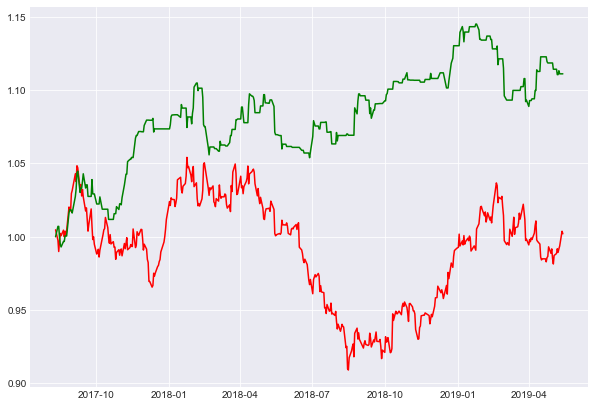

In [10]:
plt.figure(figsize=(10, 7))

# Plotting gld_returns
plt.plot(((test_dataset['gld_returns'][:]+1).cumprod()), color='r', label='GLD Returns')

# Plotting test data
plt.plot(((test_dataset['Strategy'][:]+1).cumprod()), color='g', label='Strategy Returns')


From the above plot, it is clear that `strategy_returns` outperform the `gld_returns`